# Carga de librerías y dataset

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("neuromusic/avocado-prices")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/avocado-prices


Cambios a realizar

- Normalización, estandarización, log transform

In [129]:
df = pd.read_csv(path + "/avocado.csv")

In [130]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


La columnas 'Unnamed: 0' y 'year' no son necesarias

In [131]:
df.drop(['Unnamed: 0', 'year'], axis = 1, inplace=True)

# Imputación de valores varios

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  region        18249 non-null  object 
dtypes: float64(9), object(3)
memory usage: 1.7+ MB


Se observa que no hay valores nulos, por lo que no se realiza ningún cambio

# Transformación de datos

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  region        18249 non-null  object 
dtypes: float64(9), object(3)
memory usage: 1.7+ MB


El tipo de valor de la fecha debería de ser de tipo datetime

In [114]:
df['Date'] = pd.to_datetime(df['Date'])

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 1.7+ MB


# Detección y eliminación de valores atípicos

In [98]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


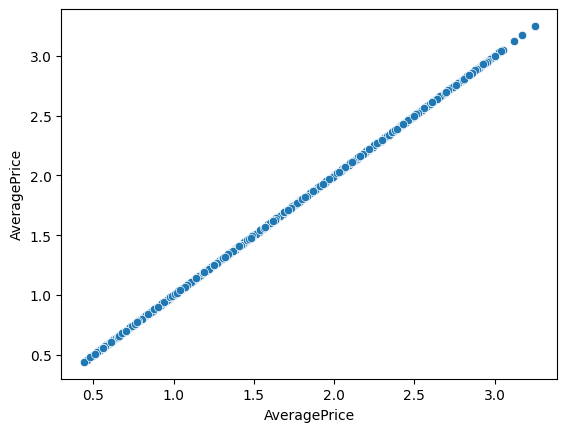

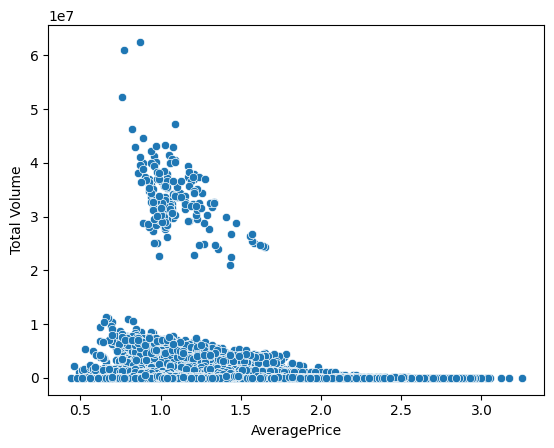

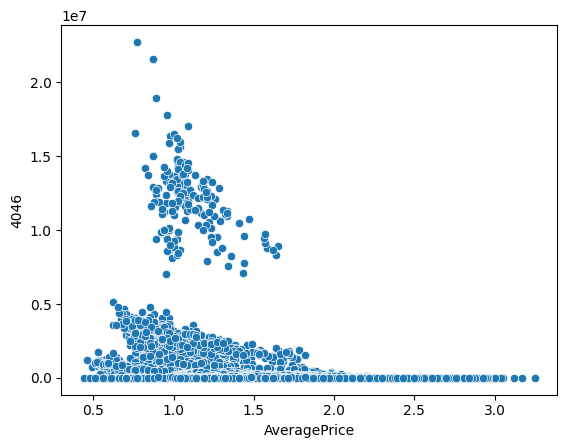

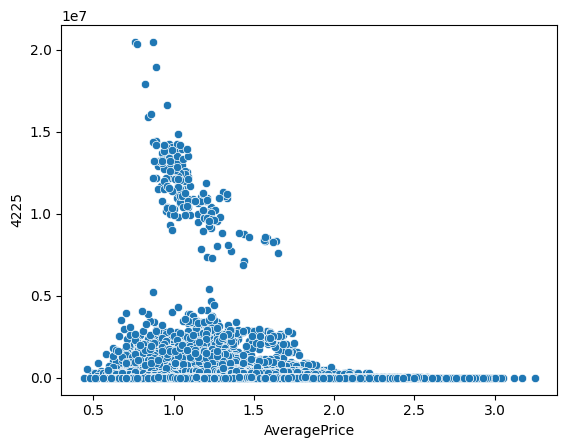

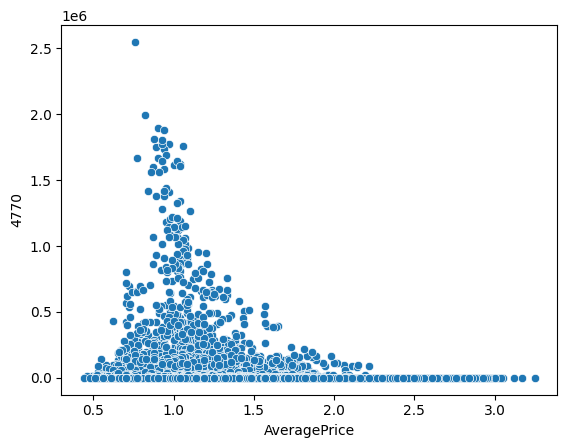

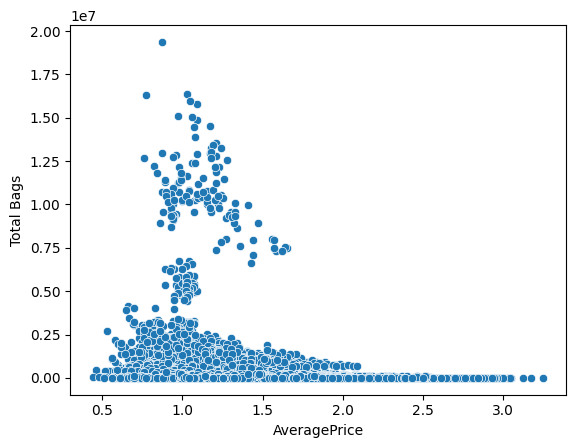

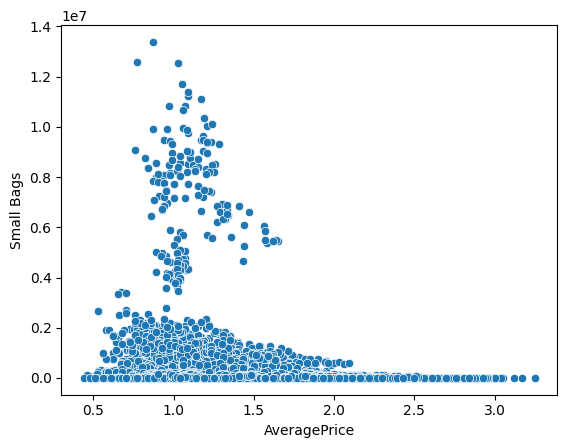

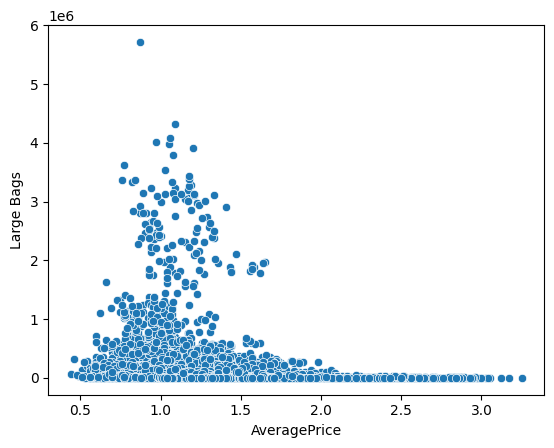

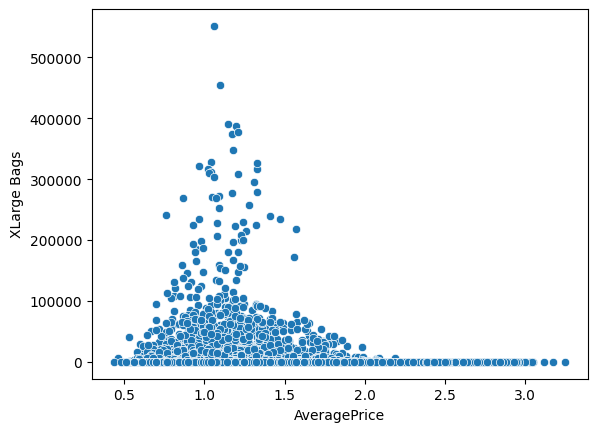

In [132]:
numerical_columns = df.select_dtypes(include=['number']).columns

for column in numerical_columns:
  sns.scatterplot(x='AveragePrice', y =column, data=df)
  plt.show()

Una estadística que podría aportar información importante inclusive si es un valor atípico es el precio promedio del aguacate, ya que, por conocimiento básico de mercado, se sabe que a mayor demanda, mayor el precio del producto, y viceversa.Con estas gráficas se observa que, si bien la cantidad vendida de bolsas de aguacate y volumen vendido si depende de el precio promedio del aguacate (para valores muy altos, directamente no se vende), la información más significativa parece estar conglomerada en donde la mayoría de puntos se encuentran. Entonces, se aplicará de igual forma el método IQR para limpiar los datos atípicos del precio promedio.

Método IQR

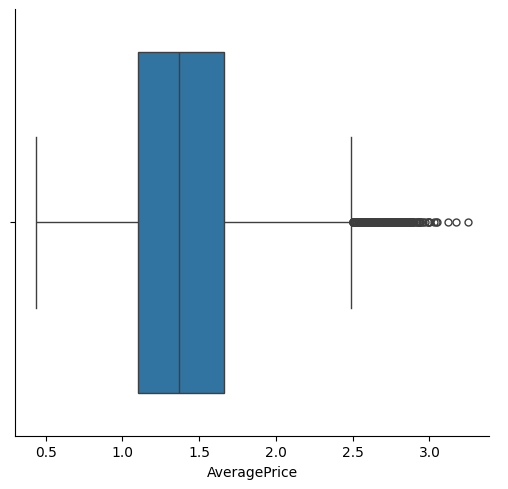

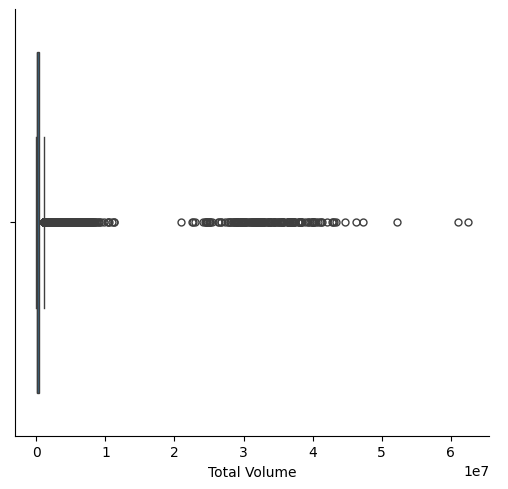

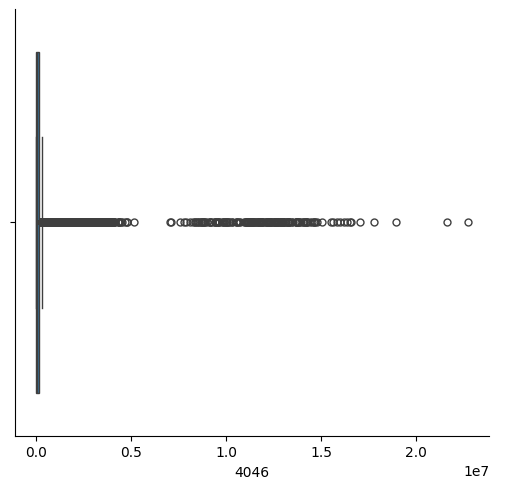

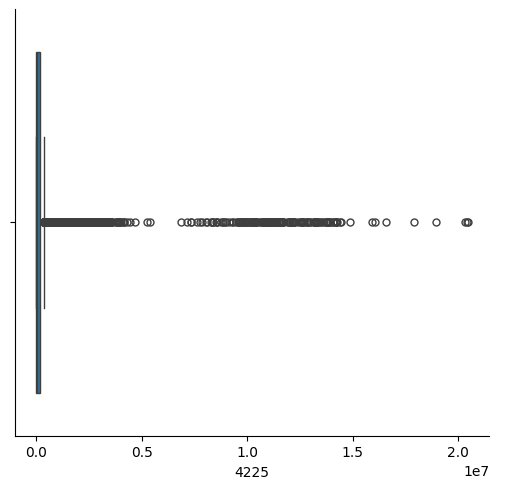

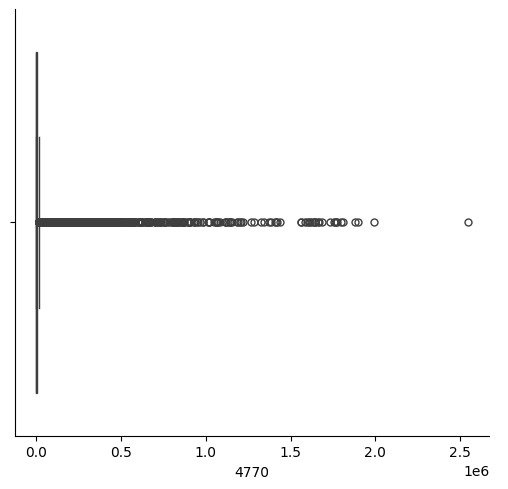

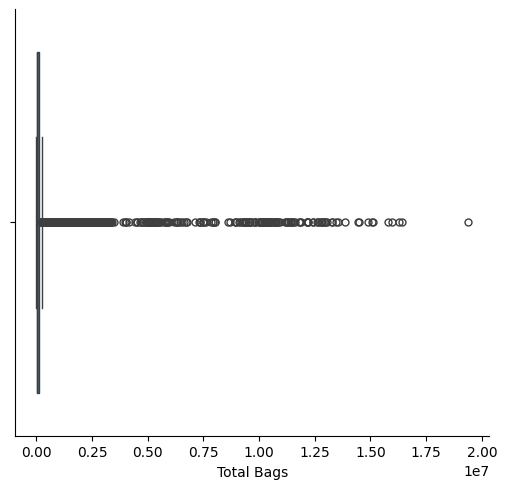

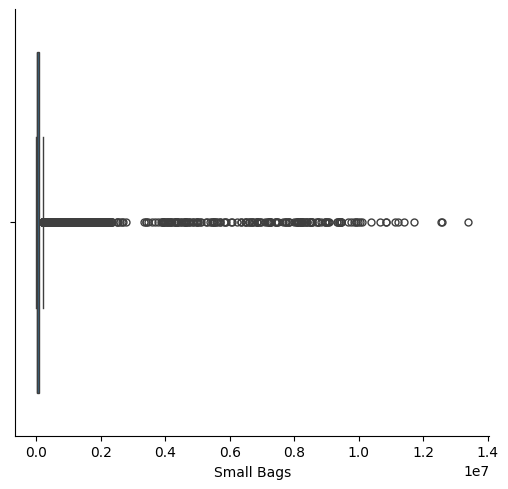

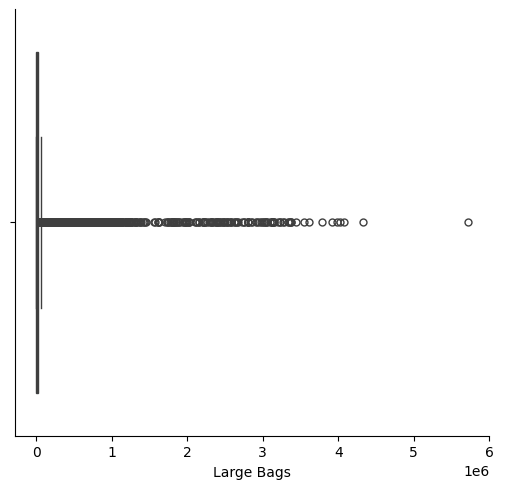

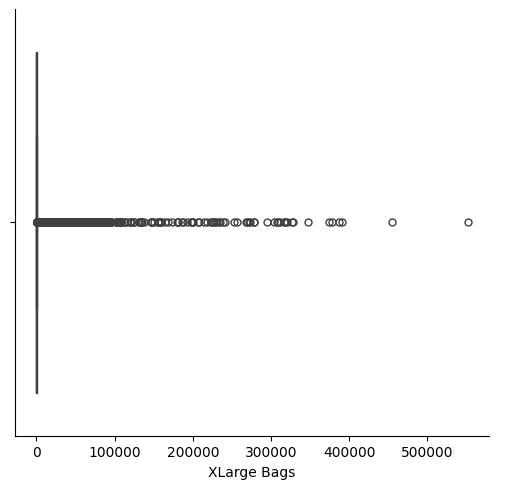

In [99]:
numerical_columns = df.select_dtypes(include=['number']).columns

for column in numerical_columns:
  sns.catplot(x=column, kind="box", data=df)

Se observan muchos valores atípicos en todos los valores numéricos

Eliminación de valores atípicos

In [143]:
df_aux = df.copy()

for column in numerical_columns:
  Q1 = df_aux[column].quantile(0.25)
  Q3 = df_aux[column].quantile(0.75)
  IQR = Q3 - Q1

  fences = [Q1 - IQR*1.5, Q3 + IQR*1.5]

  df_aux = df_aux[(df_aux[column] >= fences[0]) & (df_aux[column] <= fences[1])]

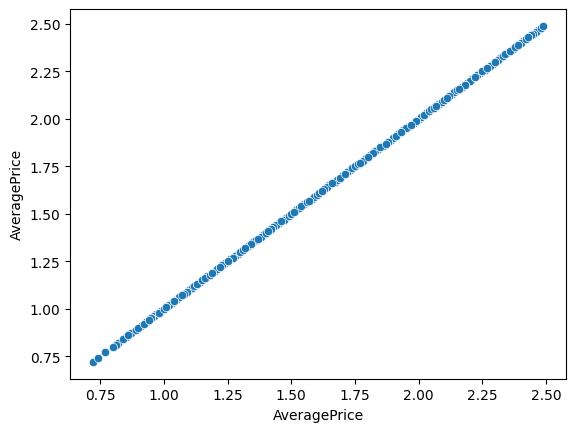

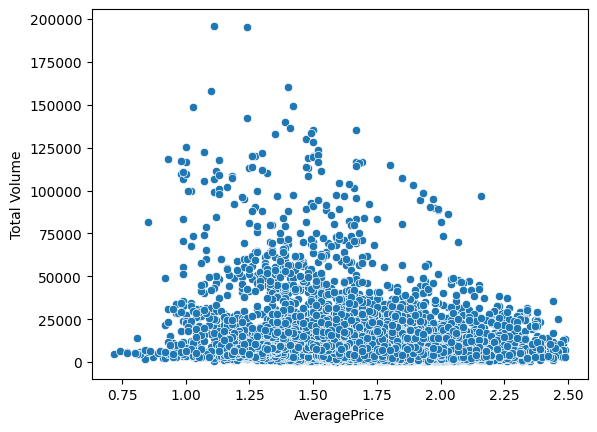

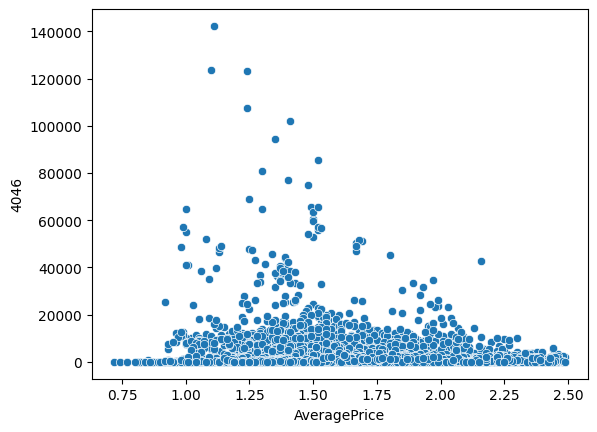

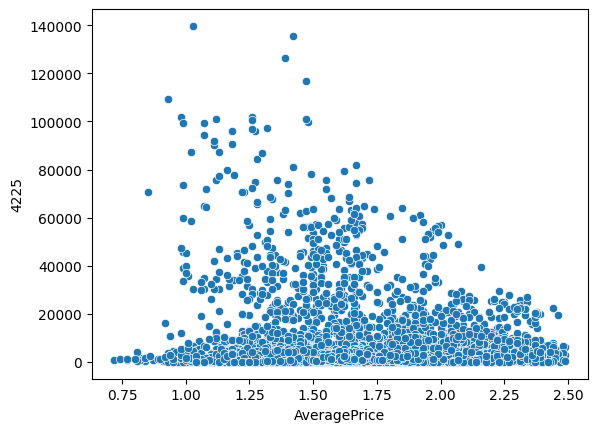

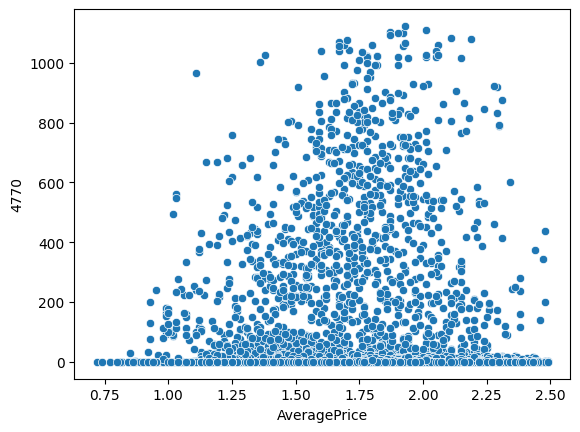

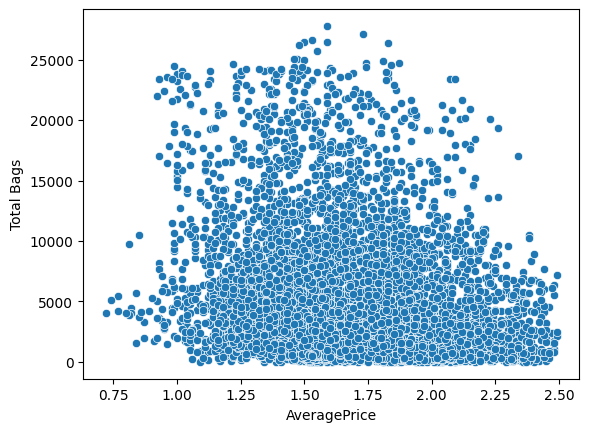

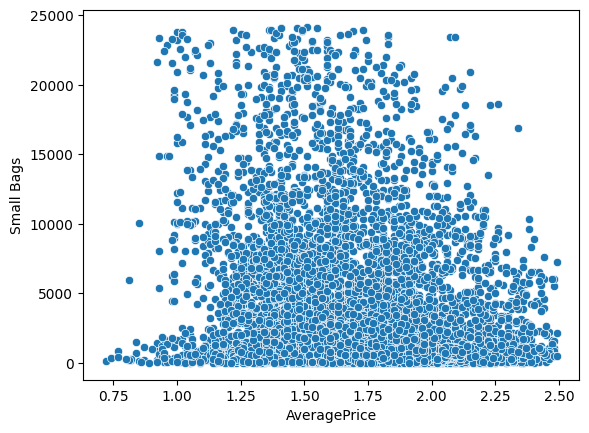

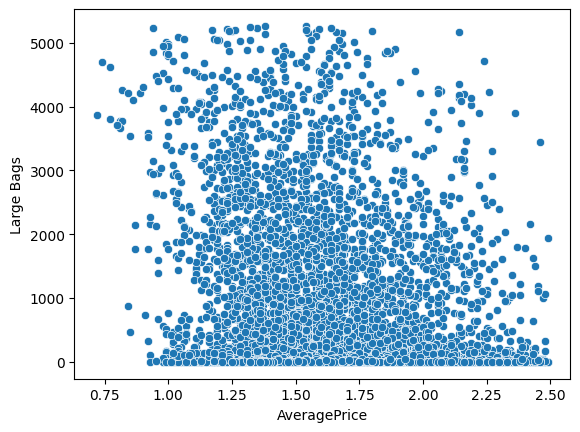

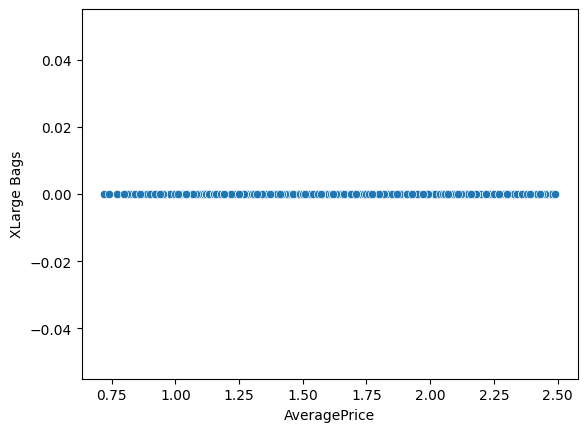

In [134]:
numerical_columns = df.select_dtypes(include=['number']).columns

for column in numerical_columns:
  sns.scatterplot(x='AveragePrice', y =column, data=df_aux)
  plt.show()

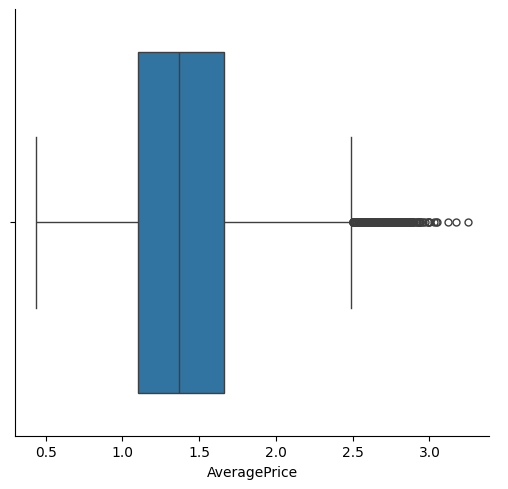

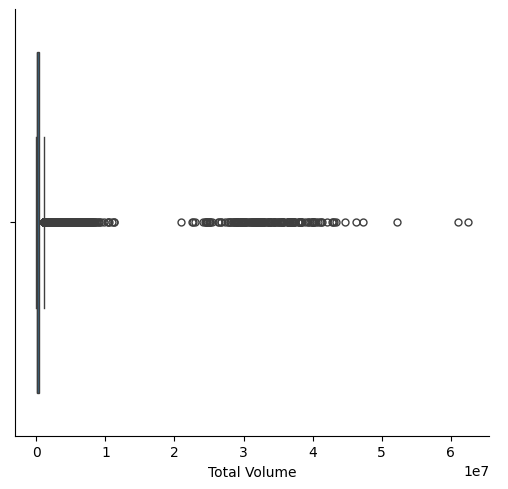

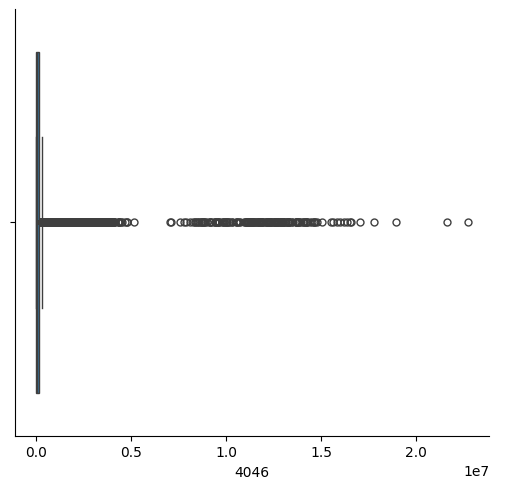

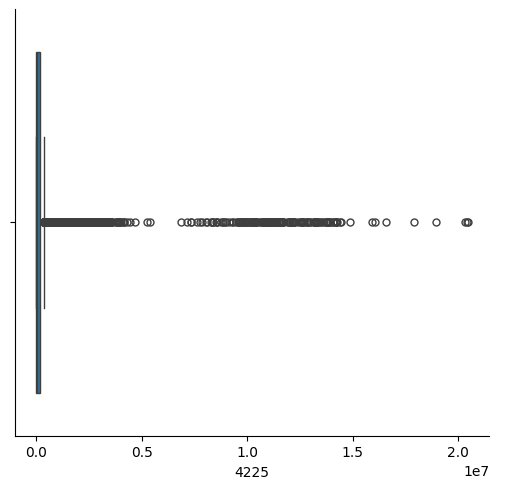

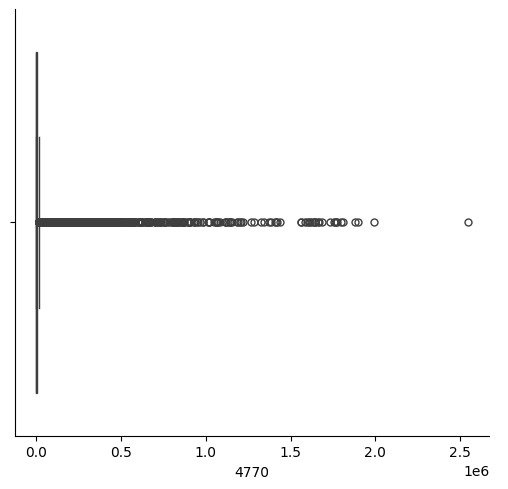

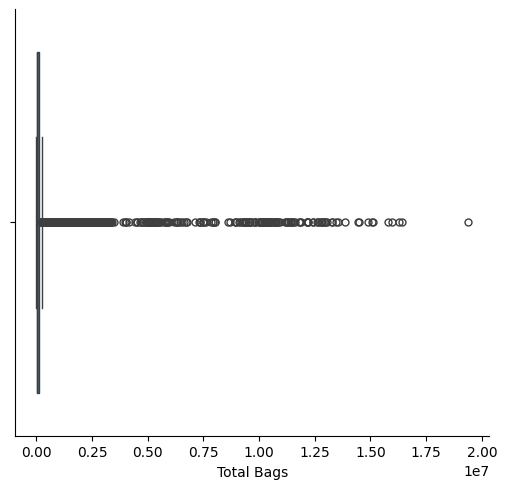

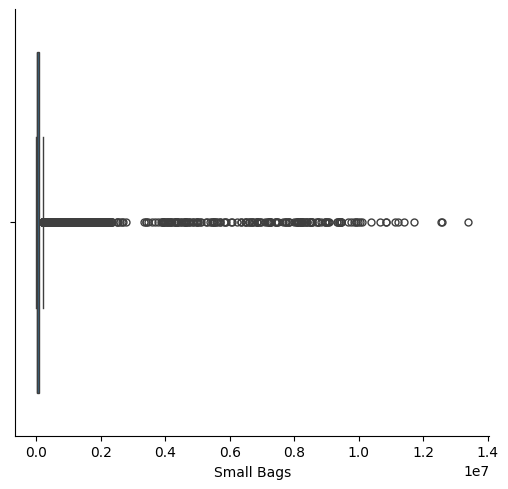

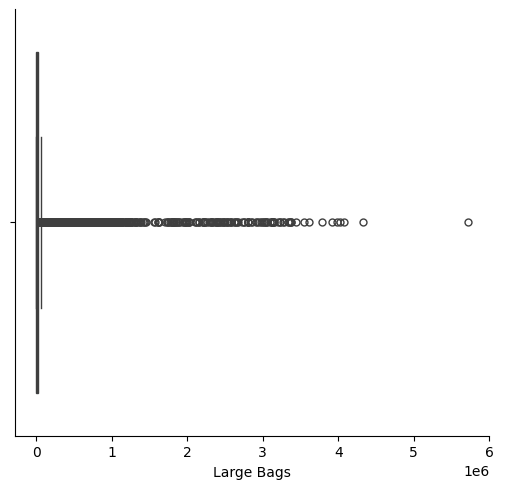

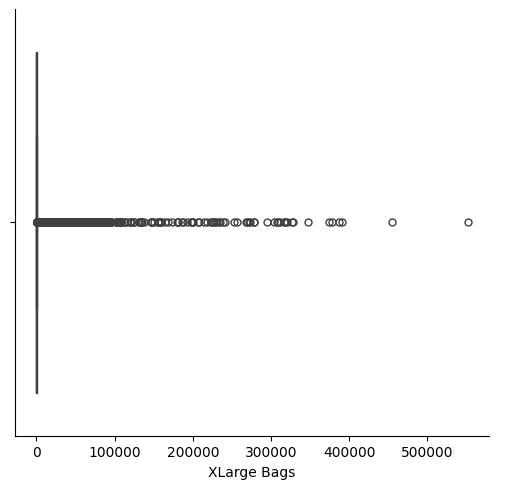

In [135]:
numerical_columns = df.select_dtypes(include=['number']).columns

for column in numerical_columns:
  sns.catplot(x=column, kind="box", data=df)

In [126]:
display(df_aux['Total Volume'].describe())
display(df_aux['4046'].describe())
display(df_aux['4225'].describe())
display(df_aux['4770'].describe())
display(df_aux['Total Bags'].describe())
display(df_aux['Small Bags'].describe())
display(df_aux['Large Bags'].describe())
display(df_aux['XLarge Bags'].describe())

,Total Volume
count,6725.000000
mean,13071.896764
std,17417.794571
min,84.560000
25%,3752.940000
50%,7728.450000
75%,14482.570000
max,196031.900000


,4046
count,6725.000000
mean,2422.381022
std,6786.473328
min,0.000000
25%,88.020000
50%,503.140000
75%,1816.690000
max,142332.450000


,4225
count,6725.000000
mean,5577.586097
std,11818.559671
min,0.000000
25%,322.960000
50%,1862.680000
75%,4643.120000
max,139735.900000


,4770
count,6725.000000
mean,62.795949
std,176.623292
min,0.000000
25%,0.000000
50%,0.000000
75%,8.130000
max,1123.580000


,Total Bags
count,6725.000000
mean,5008.511868
std,5209.367054
min,0.000000
25%,1249.860000
50%,3170.150000
75%,6981.280000
max,27784.670000


,Small Bags
count,6725.000000
mean,4283.506717
std,5139.174462
min,0.000000
25%,669.690000
50%,2083.750000
75%,6267.020000
max,24150.680000


,Large Bags
count,6725.000000
mean,725.005300
std,1142.089477
min,0.000000
25%,0.000000
50%,107.090000
75%,1022.660000
max,5262.240000


,XLarge Bags
count,6725.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


Después de la eliminación de valores atípicos, se observa que la columna 'XLarge Bags' ya no es necesaria. Básicamente la mayoría de valores en dicha variable eran 0, por lo que se eliminó cualquier otro que no fuese 0. Las columnas '4770' y 'Large Bags' podrían ser removidas, ya que una tiene la mitad de valores como cero, y la otra tiene un cuarto de valores como 0, respectivamente. Esto puede implicar que desde el inicio sus datos eran en su mayoría 0. Se puede volver a hacer el proceso de IQR con el dataset original sin estas columnas para eliminar menos valores.

In [146]:
df_aux.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'region'],
      dtype='object')

In [148]:
df_aux = df.copy()

df_aux.drop(['XLarge Bags', '4770', 'Large Bags'], axis = 1, inplace=True)
numerical_columns = df_aux.select_dtypes(include=['number']).columns

for column in numerical_columns:
  Q1 = df_aux[column].quantile(0.25)
  Q3 = df_aux[column].quantile(0.75)
  IQR = Q3 - Q1

  fences = [Q1 - IQR*1.5, Q3 + IQR*1.5]

  df_aux = df_aux[(df_aux[column] >= fences[0]) & (df_aux[column] <= fences[1])]

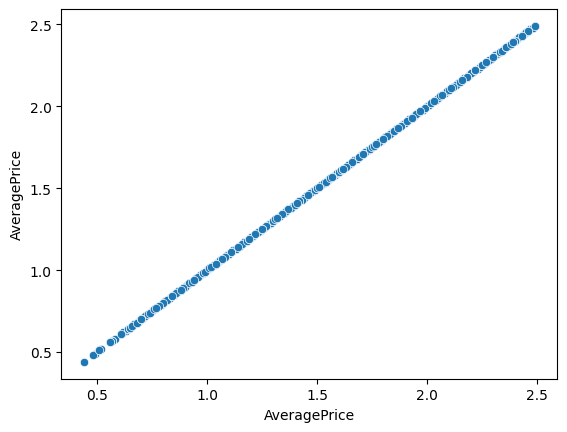

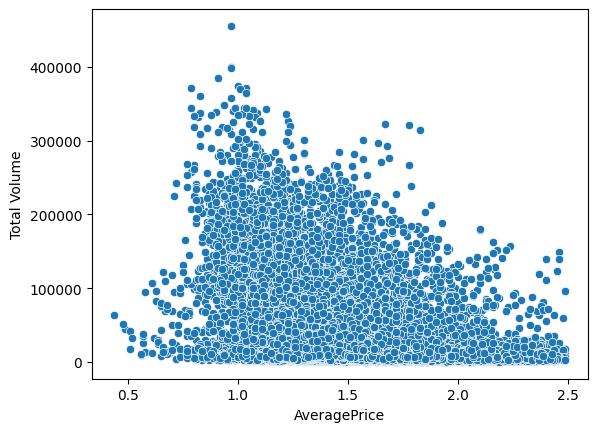

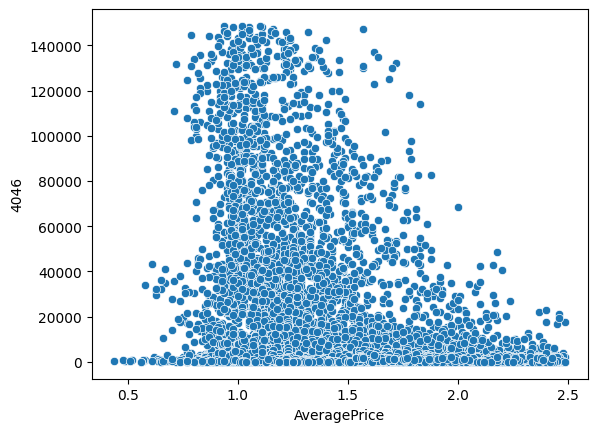

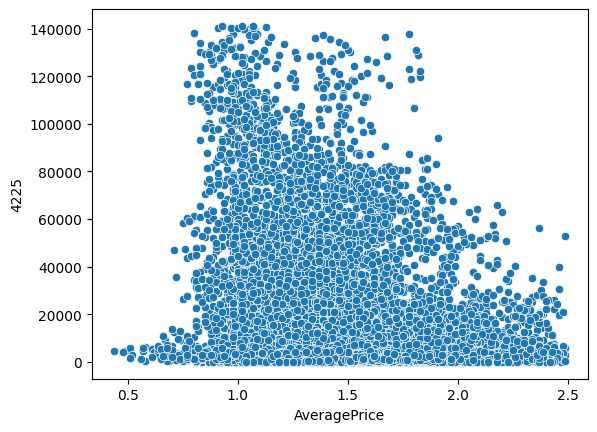

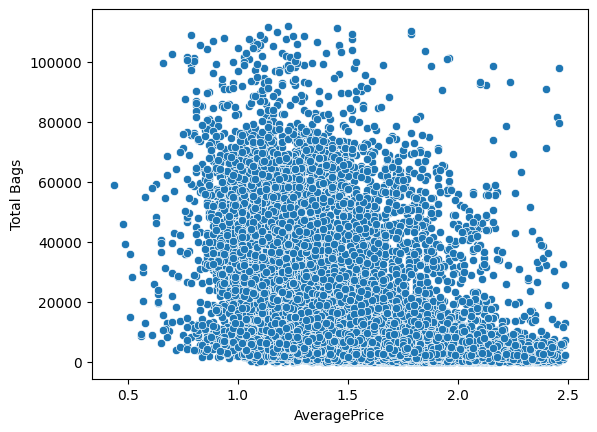

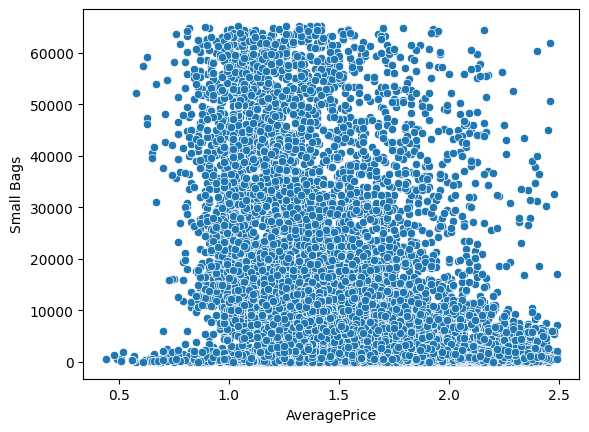

In [153]:
numerical_columns = df_aux.select_dtypes(include=['number']).columns

for column in numerical_columns:
  sns.scatterplot(x='AveragePrice', y =column, data=df_aux)
  plt.show()

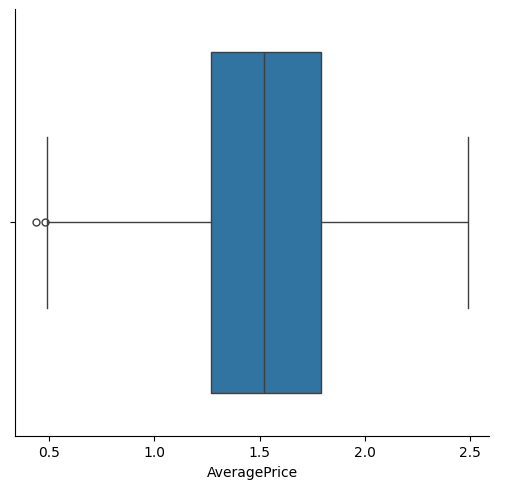

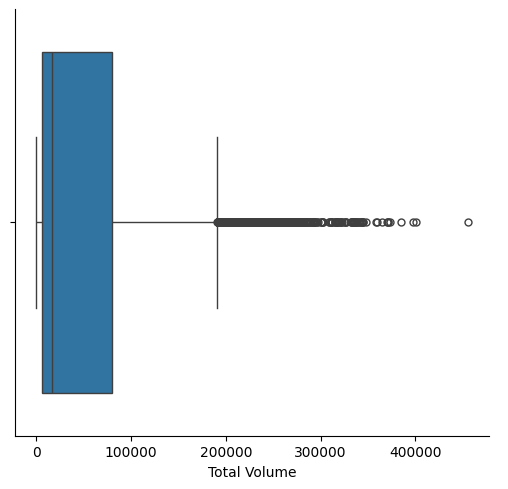

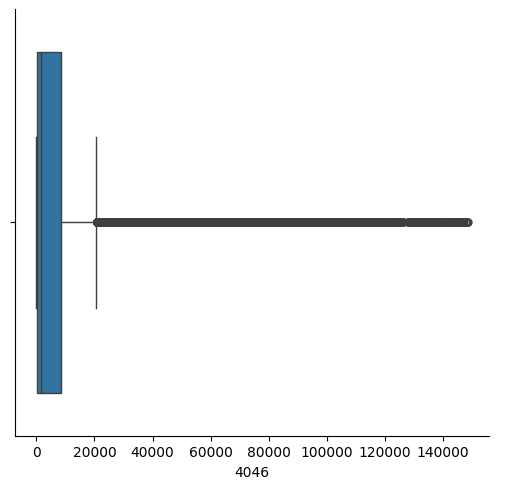

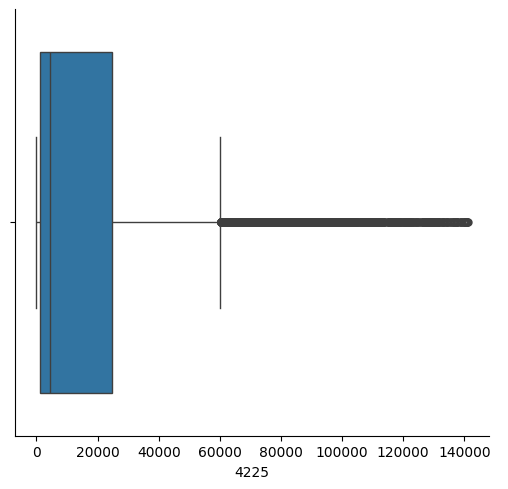

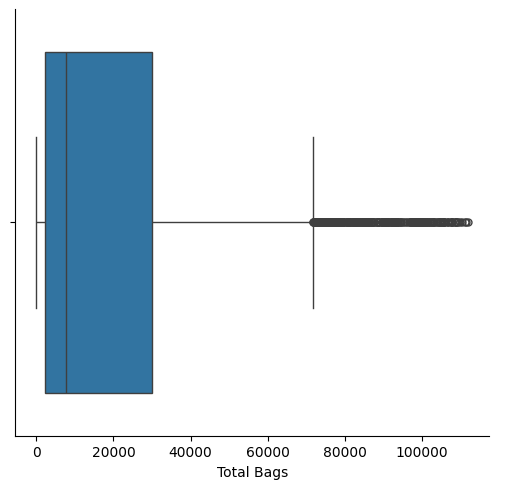

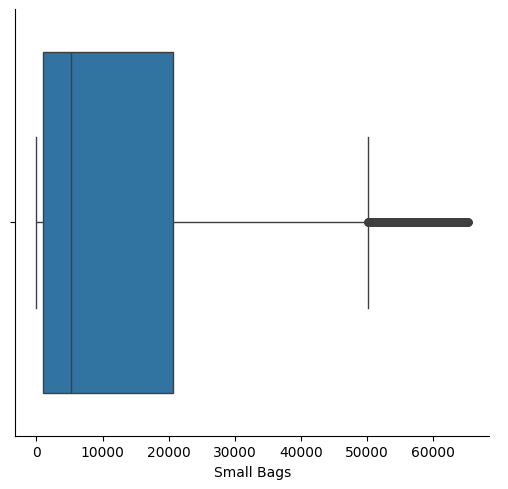

In [154]:
numerical_columns = df_aux.select_dtypes(include=['number']).columns

for column in numerical_columns:
  sns.catplot(x=column, kind="box", data=df_aux)

In [155]:
display(df_aux['Total Volume'].describe())
display(df_aux['4046'].describe())
display(df_aux['4225'].describe())
display(df_aux['Total Bags'].describe())
display(df_aux['Small Bags'].describe())

,Total Volume
count,10950.000000
mean,51930.609233
std,67694.446342
min,84.560000
25%,5986.670000
50%,16174.650000
75%,80026.595000
max,455372.430000


,4046
count,10950.000000
mean,13106.127513
std,27335.221020
min,0.000000
25%,257.647500
50%,1487.730000
75%,8435.472500
max,148633.900000


,4225
count,10950.000000
mean,18230.428082
std,27379.219388
min,0.000000
25%,1077.670000
50%,4496.300000
75%,24730.580000
max,141141.800000


,Total Bags
count,10950.000000
mean,18907.945361
std,22827.736716
min,0.000000
25%,2266.482500
50%,7777.965000
75%,30079.192500
max,111968.710000


,Small Bags
count,10950.000000
mean,13440.854276
std,17021.144630
min,0.000000
25%,1060.155000
50%,5263.625000
75%,20676.117500
max,65222.610000


En general, se obtuvieron mejores resultados al eliminar dichas columnas

In [156]:
df = df_aux.copy()

# Transformación de datos (Estandarización)

In [158]:
df.describe()

,AveragePrice,Total Volume,4046,4225,Total Bags,Small Bags
count,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000
mean,1.533528,51930.609233,13106.127513,18230.428082,18907.945361,13440.854276
std,0.360203,67694.446342,27335.221020,27379.219388,22827.736716,17021.144630
min,0.440000,84.560000,0.000000,0.000000,0.000000,0.000000
25%,1.270000,5986.670000,257.647500,1077.670000,2266.482500,1060.155000
50%,1.520000,16174.650000,1487.730000,4496.300000,7777.965000,5263.625000
75%,1.790000,80026.595000,8435.472500,24730.580000,30079.192500,20676.117500
max,2.490000,455372.430000,148633.900000,141141.800000,111968.710000,65222.610000


Debido a la gran diferencia entre los valores de volumen y precio promedio, se estandarizaran cada una de las columnas numéricas del dataset. Aun así, se crearan dos datasets en formato .csv: Uno sin estandarizar y otro estandarizado en caso de ser necesario el original.

In [162]:
df_estandar = df.copy()

numerical_columns = df_estandar.select_dtypes(include=['number']).columns


for column in numerical_columns:

  min_value = df_estandar[column].min()
  max_value = df_estandar[column].max()
  df_estandar[column] = (df_estandar[column] - min_value) / (max_value - min_value)

In [164]:
df_estandar.describe()

,AveragePrice,Total Volume,4046,4225,Total Bags,Small Bags
count,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000
mean,0.533428,0.113875,0.088177,0.129164,0.168868,0.206077
std,0.175709,0.148685,0.183910,0.193984,0.203876,0.260970
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.404878,0.012963,0.001733,0.007635,0.020242,0.016254
50%,0.526829,0.035340,0.010009,0.031857,0.069466,0.080702
75%,0.658537,0.175586,0.056753,0.175218,0.268639,0.317008
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Guardado de ambos datasets

In [165]:
df_aux.to_csv('avocado_clean.csv', index=False)
df_estandar.to_csv('avocado_standarized.csv', index=False)

#